##Table of content

[Used libraries and dataset](#scrollTo=cEkm5osybtzA)

>[Libraries](#scrollTo=9xN-c6ixCSAe)

>[Dataset Fetching](#scrollTo=KRnqffMKCYZU)

[Data Exploring and Visualzing](#scrollTo=fNQJ15Ocgl3K)

>[Images Visualization](#scrollTo=tBPBfyaMOAqW)

>[Classes Distrubtion](#scrollTo=7FmkVz3vOH-J)

[Images Preprocessing](#scrollTo=AXgLApoOQ_28)

>[Smoothing](#scrollTo=ENHZiHvQXtk3)

>[Thresholding](#scrollTo=NO8Lc6HlY5F3)

>[Edge Detection](#scrollTo=j4bN5hPjZJNw)

>[Dilation](#scrollTo=BtFzKdL5aDZG)

>[Preprocessing Wrapper Function](#scrollTo=5Koc1NI6bT6l)

[Features Extraction](#scrollTo=mfBEteiAllZL)

[Data Preparing](#scrollTo=cwr9V07Nm7rk)

>[A)  Preprocessing:](#scrollTo=cBiBuaI8nAkU)

>[B) Feature Extraction](#scrollTo=zUOESNAynJz7)

>[C) Final Dataframe](#scrollTo=1WU8iYecnPOU)

>[D) Data splitting](#scrollTo=vrr9sgGInSAy)

[Models Training](#scrollTo=Bs4OSFxVoh5v)

[Final Results](#scrollTo=YharGDyao-mD)



##Used libraries and dataset

###Libraries

In [32]:
import os
import imageio
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import random
from collections import Counter
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm


###Dataset Fetching

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"


In [ ]:
!pip install kaggle

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [ ]:
!kaggle datasets download -d hamdallak/the-iqothnccd-lung-cancer-dataset

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1283, in dataset_download_cli
    self.dataset_download_files(dataset,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1224, in dataset_download_files
    effective_path = self.get_default_download_dir(
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 384, in get_default_download_dir
    return os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected


In [ ]:
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


In [ ]:
!unzip \*.zip  && rm *.zip


shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


##Data Exploring and Visualzing

In [3]:
directory = "/content/drive/My Drive/Kaggle/The IQ-OTHNCCD lung cancer dataset"
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

###Images Visualization

In [4]:
def visualize_class_samples(samples,category):
    fig = plt.figure(figsize=(8, 4))

    ax1 = fig.add_subplot(1, 3, 1)
    ax1.set_title('Sample 1')

    ax2 = fig.add_subplot(1, 3, 2)
    ax2.set_title('Sample 2')

    ax3 = fig.add_subplot(1, 3, 3)
    ax3.set_title('Sample 3')

    ax1.imshow(sample_imgs[0])
    ax2.imshow(sample_imgs[1])
    ax3.imshow(sample_imgs[2])
    fig.tight_layout()

    fig.suptitle(i)


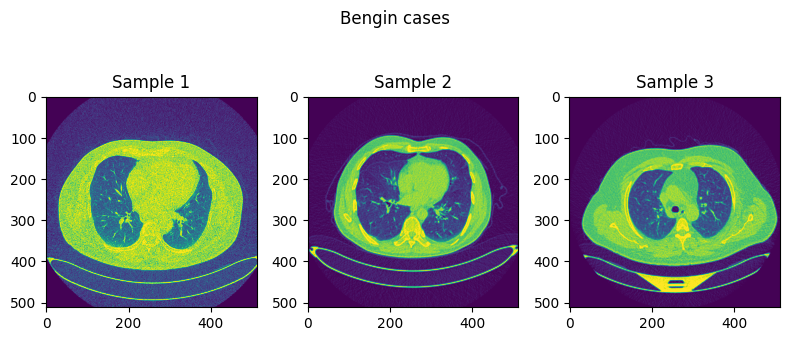

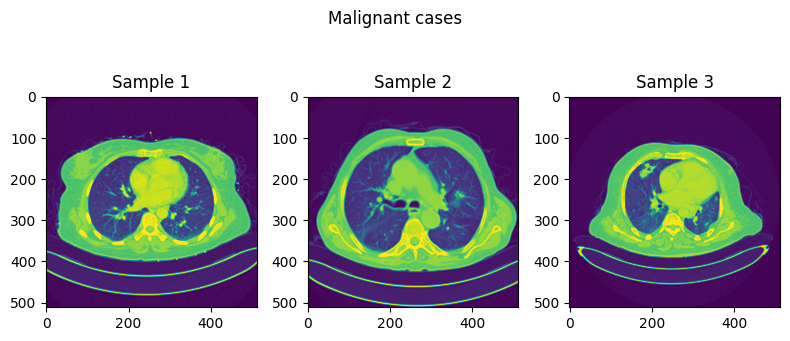

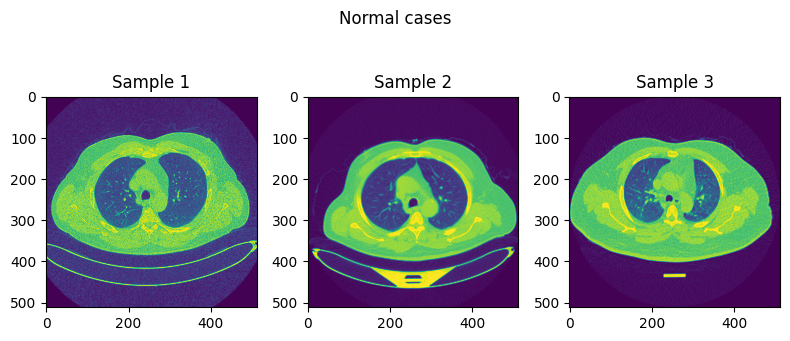

In [5]:
images, labels = [], []
sample_images_3classes=[]
for i in categories:
  sample_imgs=[]
  counter=0
  path = os.path.join(directory, i)
  class_num = categories.index(i)
  for file in os.listdir(path):
      filepath = os.path.join(path, file)
      img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
      images.append(img)
      labels.append(class_num)
      counter=counter+1
      if(counter<=3):
        sample_imgs.append(img)
        if(counter==1):
          sample_images_3classes.append([img,class_num])
  visualize_class_samples(sample_imgs,i)


###Classes Distrubtion

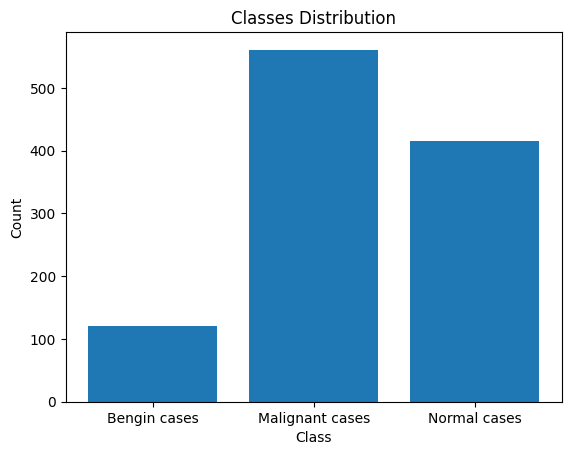

In [6]:
counts = list(Counter(labels).values())
plt.bar(categories, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classes Distribution')
plt.show()

##Images Preprocessing

In [7]:
category_names=["Bengin","Malignant","Normal"]  ##used for visualization

###Smoothing

Text(0.5, 0.98, 'Different Casses before and after smoothing')

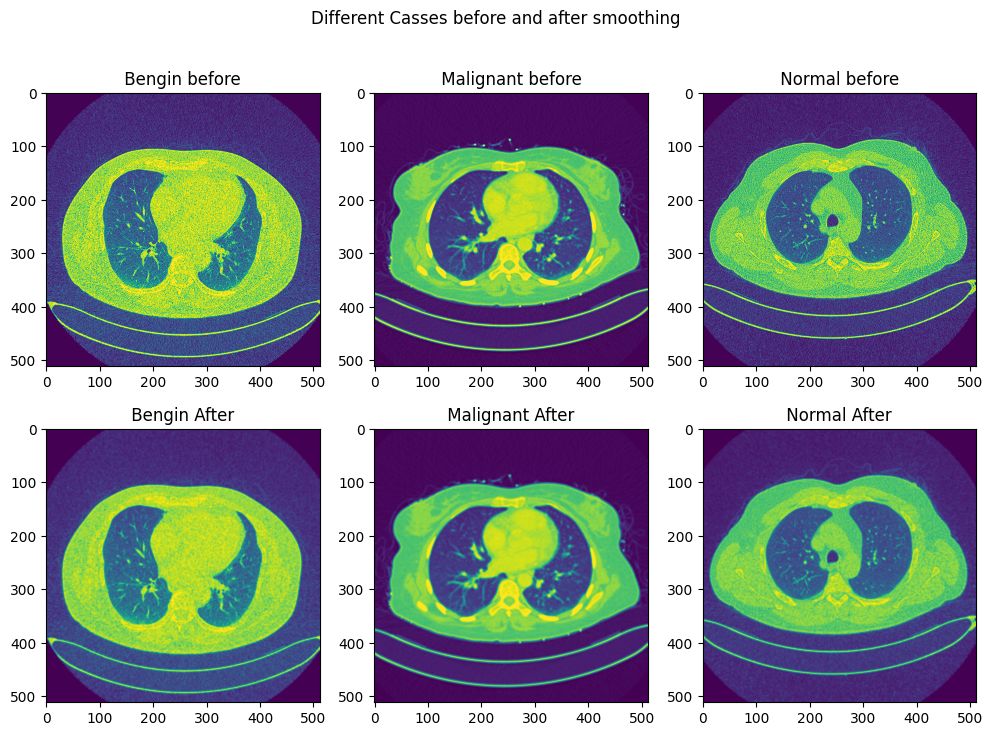

In [8]:
smoothed_imgs=[]
fig = plt.figure(figsize=(12, 8))
for img,label in sample_images_3classes:
  ax = fig.add_subplot(2, 3, label+1)
  ax.set_title(f' {category_names[label]} before ')
  ax.imshow(img)
  img=  cv2.GaussianBlur(img, (5, 5), 0)
  smoothed_imgs.append([img,label])
  ax = fig.add_subplot(2, 3, label+4)
  ax.set_title(f' {category_names[label]} After ')
  ax.imshow(img)
fig.suptitle("Different Casses before and after smoothing")



###Thresholding

Text(0.5, 0.98, 'Different Casses before and after smoothing & threholding')

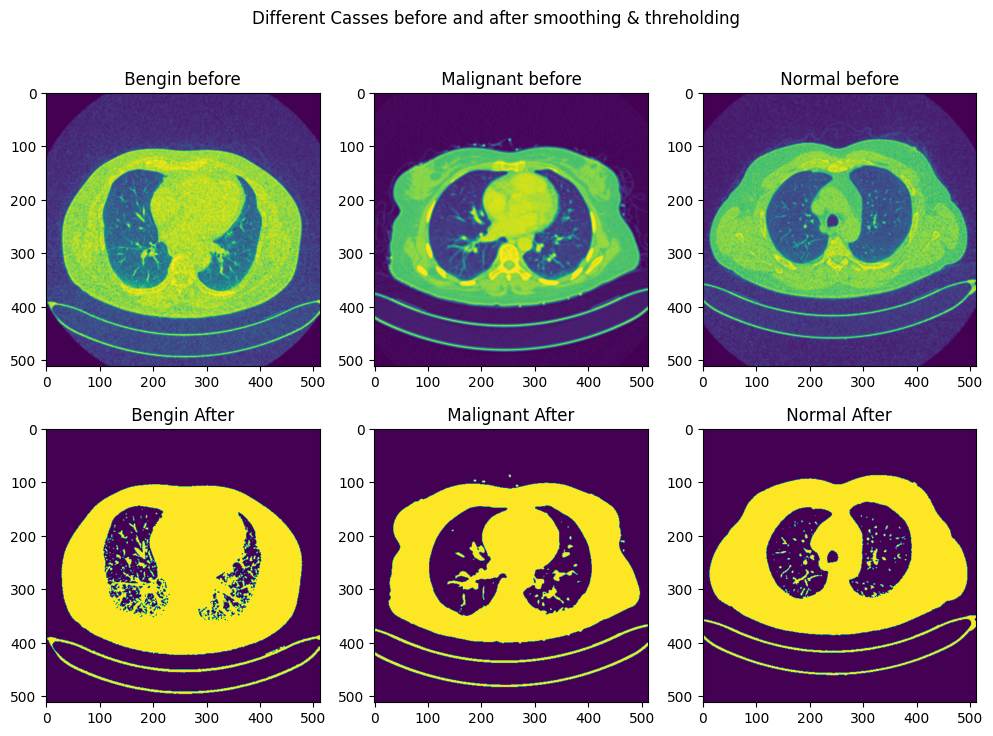

In [9]:
thresholded_imgs=[]
fig = plt.figure(figsize=(12, 8))
for img,label in smoothed_imgs:
  ax = fig.add_subplot(2, 3, label+1)
  ax.set_title(f' {category_names[label]} before ')
  ax.imshow(img)
  ret,img = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
  thresholded_imgs.append([img,label])
  ax = fig.add_subplot(2, 3, label+4)
  ax.set_title(f' {category_names[label]} After ')
  ax.imshow(img)
fig.suptitle("Different Casses before and after smoothing & threholding")

###Edge Detection

Text(0.5, 0.98, 'Different Casses Edges')

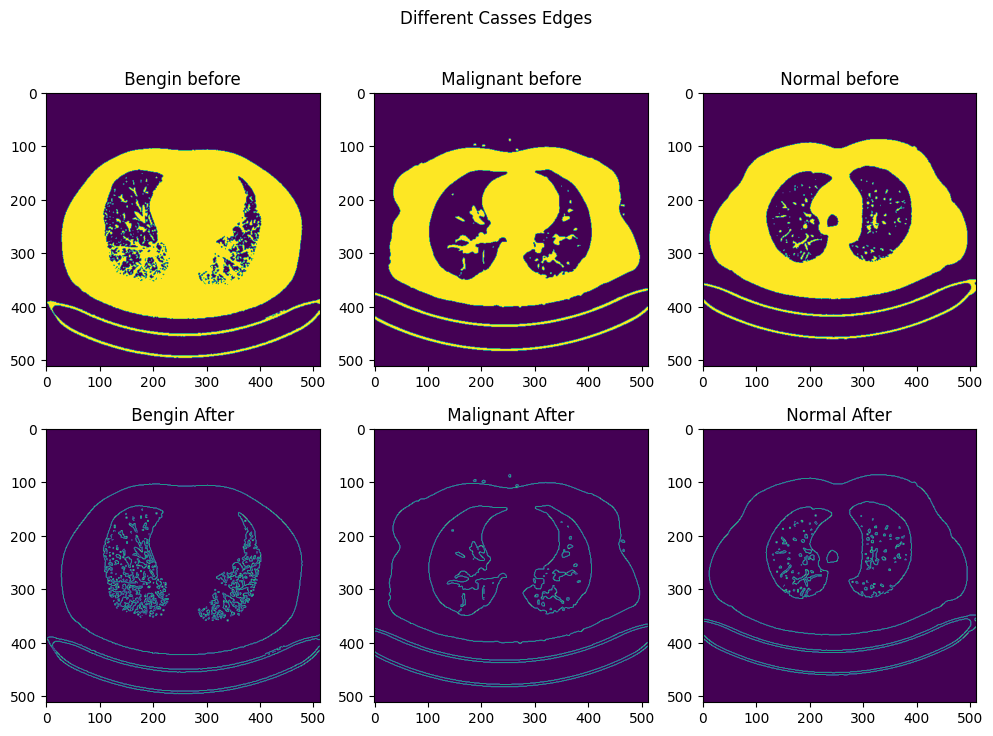

In [10]:
edges=[]
fig = plt.figure(figsize=(12, 8))
for img,label in thresholded_imgs:
  ax = fig.add_subplot(2, 3, label+1)
  ax.set_title(f' {category_names[label]} before ')
  ax.imshow(img)
  img = cv2.Canny(img, 20, 30)
  edges.append([img,label])
  ax = fig.add_subplot(2, 3, label+4)
  ax.set_title(f' {category_names[label]} After ')
  ax.imshow(img)
fig.suptitle("Different Casses Edges")

###Dilation

Text(0.5, 0.98, 'Different Casses after deliation')

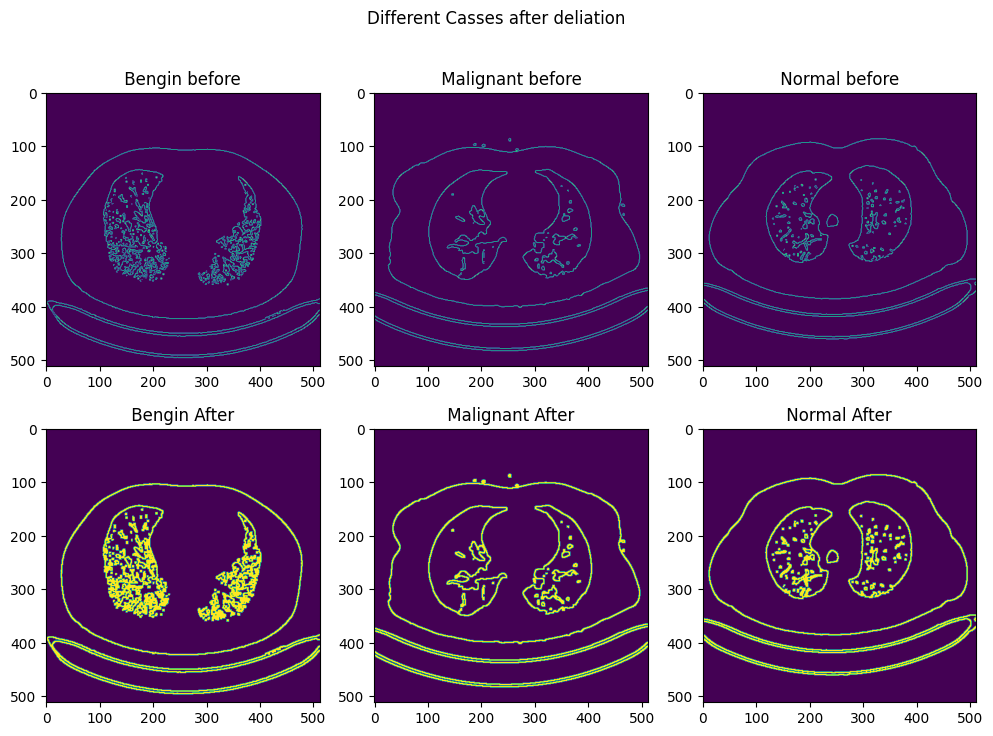

In [11]:
deliated=[]
fig = plt.figure(figsize=(12, 8))
for img,label in edges:
  ax = fig.add_subplot(2, 3, label+1)
  ax.set_title(f' {category_names[label]} before ')
  ax.imshow(img)
  img = cv2.dilate(img,None)
  deliated.append([img,label])
  ax = fig.add_subplot(2, 3, label+4)
  ax.set_title(f' {category_names[label]} After ')
  ax.imshow(img)
fig.suptitle("Different Casses after deliation")

###Preprocessing Wrapper Function

In [12]:
def preprocess_img(img):
        img=  cv2.GaussianBlur(img, (5, 5), 0)
        ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        img = cv2.Canny(img, 20, 30)
        img = cv2.dilate(img,None)
        img = cv2.resize(img, (256, 256))
        return img

##Features Extraction

In [13]:
def images_to_features(imgs,labels):
  contrast_values = []
  dissimilarity_values = []
  homogeneity_values = []
  energy_values = []
  correlation_values = []
  for image in imgs:
      # 1)Image Normalization
      image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

      # 2) Compute GLCM
      distances = [5]
      angles = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]
      glcm = graycomatrix(image, distances, angles, levels=256, symmetric=True, normed=True)

      # 3)Extract GLCM features
      contrast = graycoprops(glcm, 'contrast')
      dissimilarity = graycoprops(glcm, 'dissimilarity')
      homogeneity = graycoprops(glcm, 'homogeneity')
      energy = graycoprops(glcm, 'energy')
      correlation = graycoprops(glcm, 'correlation')

      # 4)Append the features to the respective lists
      contrast_values.append(contrast.flatten())
      dissimilarity_values.append(dissimilarity.flatten())
      homogeneity_values.append(homogeneity.flatten())
      energy_values.append(energy.flatten())
      correlation_values.append(correlation.flatten())

  # 4)Create a pandas DataFrame to store the features
  data = {
  'Labels': labels,
  'Contrast': contrast_values,
  'Dissimilarity': dissimilarity_values,
  'Homogeneity': homogeneity_values,
  'Energy': energy_values,
  'Correlation': correlation_values
  }
  df = pd.DataFrame(data)
  return df


##Data Preparing

###A)  Preprocessing:

In [14]:
preprocessed_images=[]
for image in images:
  preprocessed_images.append(preprocess_img(image))

### B) Feature Extraction

In [15]:
 features_df=images_to_features(preprocessed_images,labels)
 features_df

,Labels,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,0,"[6075.009182021914, 7748.633030990174, 7913.67...","[29.573487300796813, 36.71239606953893, 37.421...","[0.8304093357271594, 0.7990961139820392, 0.795...","[0.8024202164778634, 0.7796715328466296, 0.778...","[0.42954371513275924, 0.2803822664118242, 0.25..."
1,0,"[5308.368806025895, 7056.0779950869255, 7397.2...","[25.530596364541825, 32.8139172335601, 34.1503...","[0.8564123378742973, 0.8260366755156092, 0.821...","[0.8418927996955899, 0.820969717764946, 0.8183...","[0.3249327513189442, 0.11347769883849598, 0.06..."
2,0,"[4954.069830054779, 6177.35974111867, 6562.159...","[23.56363608067728, 28.739528218694893, 30.246...","[0.8690173578638415, 0.8467905216786242, 0.841...","[0.8559445631279418, 0.8417195700095677, 0.838...","[0.29809578672473824, 0.1355540732182415, 0.07..."
3,0,"[5193.324172061752, 6373.697467876038, 6602.77...","[24.75550921314741, 29.68474426807759, 30.5151...","[0.8625435018156145, 0.8417989372931001, 0.839...","[0.8496390749436438, 0.8355458084539871, 0.834...","[0.301641143002064, 0.15202456768917674, 0.112..."
4,0,"[6056.976188994024, 7799.495968757872, 7923.86...","[29.39731698207171, 36.78420256991686, 37.2857...","[0.832292099201982, 0.8006387610324356, 0.7991...","[0.8094658624364692, 0.7872597614647894, 0.786...","[0.3821858905888274, 0.21334716960353695, 0.19..."
...,...,...,...,...,...,...
1092,2,"[4962.950541583665, 6550.718568909045, 7046.11...","[23.648063994023907, 30.254976064499875, 32.16...","[0.8679749035388697, 0.8404918711649871, 0.833...","[0.854340316144547, 0.8368181440470885, 0.8324...","[0.30692341365044395, 0.09674233541691855, 0.0..."
1093,2,"[4780.85249626494, 6636.163076341651, 7125.974...","[23.242125249003976, 31.15362811791384, 33.153...","[0.8666991854338024, 0.8322725554440336, 0.824...","[0.8515962868320036, 0.8278111078432268, 0.823...","[0.34134585845550236, 0.09719595153572891, 0.0..."
1094,2,"[5249.664840637452, 6769.173437893678, 7142.27...","[24.988545816733065, 31.300233056185444, 32.79...","[0.8608942276123647, 0.8349806306099792, 0.828...","[0.8472164140821324, 0.8301954145283429, 0.827...","[0.29800747255459076, 0.10443476716517955, 0.0..."
1095,2,"[4903.113172310757, 6488.684035651298, 7010.96...","[23.260333665338653, 29.802232930209115, 31.88...","[0.87105594758208, 0.8440818215437201, 0.83582...","[0.857340871795856, 0.8398449247408363, 0.8349...","[0.3084577614988393, 0.0962494600273802, 0.014..."


###C) Final Dataframe

In [16]:
features_df[['Contrast_at0', 'Contrast_at45',"Contrast_at90","Contrast_at135"]] = features_df['Contrast'].apply(lambda x: pd.Series(x))
features_df[['Dissimilarity_at0', 'Dissimilarity_at45',"Dissimilarity_at90","Dissimilarity_at135"]] = features_df['Dissimilarity'].apply(lambda x: pd.Series(x))
features_df[['Correlation_at0', 'Correlation_at45',"Correlation_at90","Correlation_at135"]] = features_df['Correlation'].apply(lambda x: pd.Series(x))
features_df[['Energy_at0', 'Energy_at45',"Energy_at90","Energy_at135"]] = features_df['Energy'].apply(lambda x: pd.Series(x))
features_df[['Homogeneity_at0', 'Homogeneity_at45',"Homogeneity_at90","Homogeneity_at135"]] = features_df['Homogeneity'].apply(lambda x: pd.Series(x))
features_df.drop(["Contrast",'Homogeneity','Dissimilarity','Energy','Correlation'], axis=1, inplace=True)
features_df

,Labels,Contrast_at0,Contrast_at45,Contrast_at90,Contrast_at135,Dissimilarity_at0,Dissimilarity_at45,Dissimilarity_at90,Dissimilarity_at135,Correlation_at0,...,Correlation_at90,Correlation_at135,Energy_at0,Energy_at45,Energy_at90,Energy_at135,Homogeneity_at0,Homogeneity_at45,Homogeneity_at90,Homogeneity_at135
0,0,6075.009182,7748.633031,7913.670505,7698.139298,29.573487,36.712396,37.421128,36.517290,0.429544,...,0.259997,0.285072,0.802420,0.779672,0.778366,0.780037,0.830409,0.799096,0.795985,0.799553
1,0,5308.368806,7056.077995,7397.283896,7044.756315,25.530596,32.813917,34.150367,32.747339,0.324933,...,0.064563,0.114900,0.841893,0.820970,0.818331,0.821083,0.856412,0.826037,0.821396,0.826745
2,0,4954.069830,6177.359741,6562.159736,6258.243874,23.563636,28.739528,30.246638,29.056705,0.298096,...,0.073087,0.124235,0.855945,0.841720,0.838234,0.840878,0.869017,0.846791,0.841425,0.845767
3,0,5193.324172,6373.697468,6602.777702,6344.089223,24.755509,29.684744,30.515127,29.614985,0.301641,...,0.112109,0.155964,0.849639,0.835546,0.834205,0.835012,0.862544,0.841799,0.839573,0.841563
4,0,6056.976189,7799.495969,7923.861616,7755.396007,29.397317,36.784203,37.285794,36.631204,0.382186,...,0.195528,0.217795,0.809466,0.787260,0.786232,0.787646,0.832292,0.800639,0.799159,0.800796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2,4962.950542,6550.718569,7046.112332,6551.034612,23.648064,30.254976,32.164561,30.229182,0.306923,...,0.018177,0.096699,0.854340,0.836818,0.832422,0.836409,0.867975,0.840492,0.833504,0.840618
1093,2,4780.852496,6636.163076,7125.974446,6557.121977,23.242125,31.153628,33.153044,30.797399,0.341346,...,0.025787,0.107949,0.851596,0.827811,0.823164,0.828975,0.866699,0.832273,0.824462,0.834367
1094,2,5249.664841,6769.173438,7142.270792,6819.181406,24.988546,31.300233,32.798929,31.519526,0.298007,...,0.044926,0.097819,0.847216,0.830195,0.827232,0.829471,0.860894,0.834981,0.828991,0.833894
1095,2,4903.113172,6488.684036,7010.967816,6453.497213,23.260334,29.802233,31.882781,29.689484,0.308458,...,0.014595,0.101150,0.857341,0.839845,0.834919,0.840017,0.871056,0.844082,0.835822,0.844239


### D) Data splitting

In [17]:
y = features_df.pop('Labels')
X = features_df

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=10, shuffle=True,stratify=y)


## Models Training

Model Selection with hyperparameters tunning

In [22]:
models = {
    'Random Forest': (RandomForestClassifier(random_state=42),
                      {
                        'max_depth': [None, 5, 10,15,25],
                        'class_weight':[{0:0.5,1:1,2:1},
                                        {0:1.5,1:1,2:1.1},
                                        {0:2,1:1,2:1},
                                        {0:2.5,1:1,2:1.1},
                                        {0:3,1:1,2:1}]
                       }),
    'Support Vector Machine': (svm.SVC(random_state=42),
                               {'C': [0.1, 1.0, 10.0],
                                'kernel': ['linear', 'rbf',"poly"]
                                }),
        ' KNN': (KNeighborsClassifier(),
                      {
                        'n_neighbors': [3,4,5,6,7,8,9, 10,15],
                        "weights" : ['uniform', 'distance']
                       }),
}

# Perform grid search for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    mean_fit_time = grid_search.cv_results_['mean_fit_time'][grid_search.best_index_]
    mean_score_time = grid_search.cv_results_['mean_score_time'][grid_search.best_index_]
    # Evaluate the best model on the test data
    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"Model: {model_name}")
    print(f"Best Parameters: {best_params}")
    print(f"Mean Fit Time: {mean_fit_time:.4f} seconds")
    print(f"Mean Score Time: {mean_score_time:.4f} seconds")
    print(f"Accuracy: {accuracy:.4f}")

    print()

Model: Random Forest
Best Parameters: {'class_weight': {0: 2.5, 1: 1, 2: 1.1}, 'max_depth': None}
Mean Fit Time: 0.3802 seconds
Mean Score Time: 0.0156 seconds
Accuracy: 0.8273

Model: Support Vector Machine
Best Parameters: {'C': 10.0, 'kernel': 'linear'}
Mean Fit Time: 18.1039 seconds
Mean Score Time: 0.0070 seconds
Accuracy: 0.6000

Model:  KNN
Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
Mean Fit Time: 0.0025 seconds
Mean Score Time: 0.0048 seconds
Accuracy: 0.7909



##Final Results

In [23]:
KnnClf=KNeighborsClassifier(n_neighbors= 9, weights= 'distance')
RandomForestClf=RandomForestClassifier(random_state=42, class_weight={0: 2.5, 1: 1, 2: 1.1}, max_depth= None)

###Quantitative Results

In [24]:
KnnClf.fit(X_train,y_train)
RandomForestClf.fit(X_train,y_train)

y_knn_pred=KnnClf.predict(X_test)
y_randomforest_pred=RandomForestClf.predict(X_test)


y_knn_train_pred=KnnClf.predict(X_train)
y_randomforest_train_pred=RandomForestClf.predict(X_train)

In [31]:
print("Knn Scores on test")
print(classification_report(y_knn_pred,y_test))

Knn Scores on test
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.89      0.82      0.85        61
           2       0.71      0.77      0.74        39

    accuracy                           0.79       110
   macro avg       0.73      0.76      0.74       110
weighted avg       0.80      0.79      0.79       110



In [30]:
print("Random Forest Scores on test")
print(classification_report(y_randomforest_pred,y_test))

Random Forest Scores on test
              precision    recall  f1-score   support

           0       0.58      0.88      0.70         8
           1       0.91      0.82      0.86        62
           2       0.79      0.82      0.80        40

    accuracy                           0.83       110
   macro avg       0.76      0.84      0.79       110
weighted avg       0.84      0.83      0.83       110



###Qualitative Results

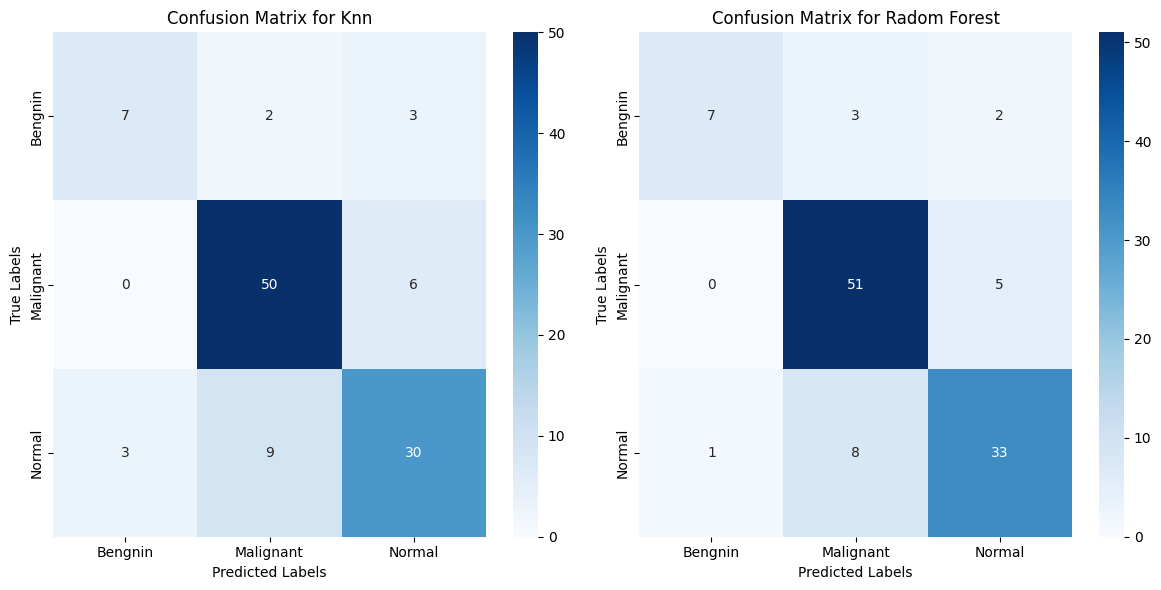

In [37]:
labels = ['Bengnin', 'Malignant',"Normal"]
cm_knn = confusion_matrix(y_test, y_knn_pred)
cm_radom_forest = confusion_matrix(y_test, y_randomforest_pred)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot confusion matrix 1
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Confusion Matrix for Knn')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot confusion matrix 2
sns.heatmap(cm_radom_forest, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Confusion Matrix for Radom Forest')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()
